In [56]:
from uncertainties import unumpy
from uncertainties import ufloat
from scipy import odr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
lcTemp = 0.1 #C
lcVoltage = 0.001 #V
lcResistance = 0 #ohms


lcFrequency = 0.001 #Khz
lcSignalVoltage = 0.001 #V


In [58]:
zeroErrorCeramic = 0.008 #V
zeroErrorPolymer = 0.015


signalFrequenecy = ufloat(1.000, lcFrequency )*1000
resistance = ufloat(1000, 10)

In [59]:
print('Reading file...')
df = pd.read_excel("data.xlsx")
print('File read successfully\n\n')

Reading file...
File read successfully




In [60]:
tempData = df['temp']

VcCeramic = df['Vc.C']
VrCeramic = df['Vr.C']

VcPolymer = df['Vc.P']
VrPolymer = df['Vr.P']


In [61]:
tempData = unumpy.uarray((tempData), lcTemp)

VcCeramic = unumpy.uarray(VcCeramic, lcVoltage)
VrCeramic = unumpy.uarray(VrCeramic, lcVoltage)
VcPolymer = unumpy.uarray(VcPolymer, lcVoltage)
VrPolymer = unumpy.uarray(VrPolymer, lcVoltage)


In [62]:
ZCeramic = VcCeramic/VrCeramic*resistance
ZPolymer = VcPolymer/VrPolymer*resistance

CCeramic = 1/(2*np.pi*signalFrequenecy*resistance*(VcCeramic/VrCeramic))
CPolymer = 1/(2*np.pi*signalFrequenecy*resistance*(VcPolymer/VrPolymer))


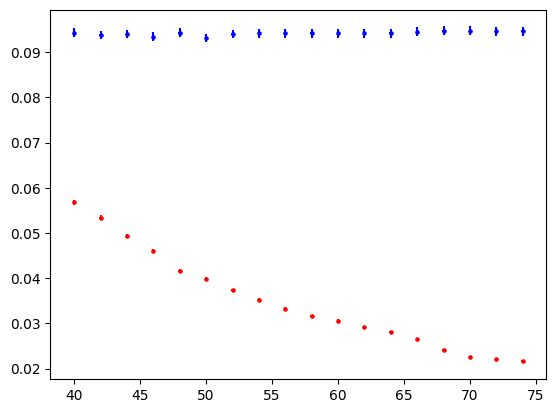

In [63]:
plt.plot(unumpy.nominal_values(tempData), unumpy.nominal_values(CCeramic), 'ro', label='Ceramic',  markersize='2')
plt.errorbar(unumpy.nominal_values(tempData), unumpy.nominal_values(CCeramic), yerr=unumpy.std_devs(CCeramic),xerr=unumpy.std_devs(tempData) ,fmt='ro', markersize='2')
plt.plot(unumpy.nominal_values(tempData), unumpy.nominal_values(CPolymer), 'bo', label='Polymer',  markersize='2')
plt.errorbar(unumpy.nominal_values(tempData), unumpy.nominal_values(CPolymer), yerr=unumpy.std_devs(CPolymer),xerr=unumpy.std_devs(tempData) ,fmt='bo', markersize='2') 
plt.show()


In [72]:

myData = odr.RealData(unumpy.nominal_values(tempData), unumpy.nominal_values(1/CCeramic), sx = unumpy.std_devs(tempData), sy = unumpy.std_devs(1/CCeramic))
myodr = odr.ODR(myData, odr.unilinear)
myoutput = myodr.run()
slope, intercept = [ufloat(beta, sd) for beta, sd in zip(myoutput.beta, myoutput.sd_beta)]

curies_temp = -1*intercept/slope

print(f"Curei Temp: {curies_temp} degree Celcius")

Curei Temp: 19.6+/-1.2 degree Celcius


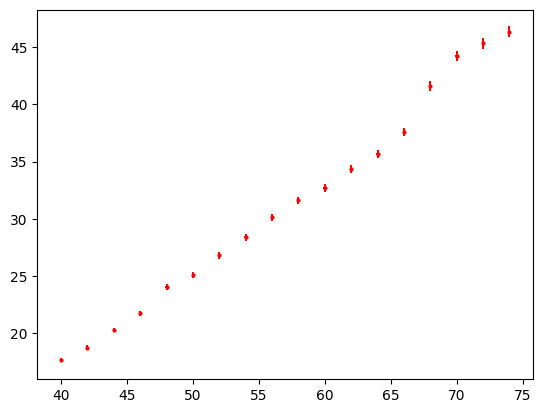

In [73]:
plt.errorbar(unumpy.nominal_values(tempData), unumpy.nominal_values(1/CCeramic), yerr=unumpy.std_devs(1/CCeramic),xerr=unumpy.std_devs(tempData) ,fmt='ro', label='Ceramic', markersize='2')
plt.show()